## Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

students = pd.read_csv('data/StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


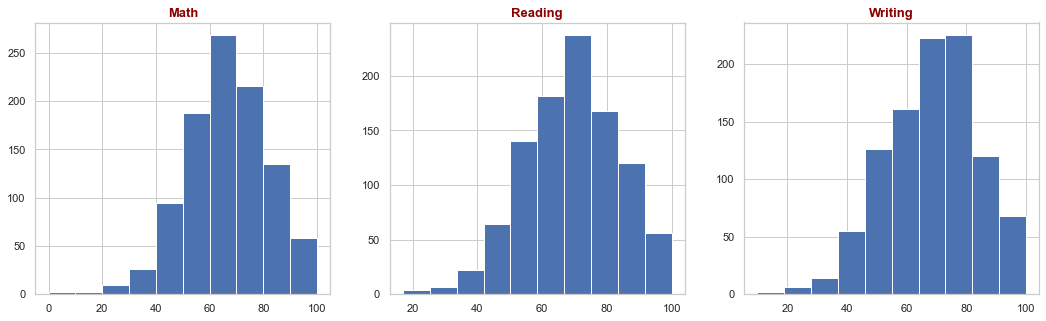

In [2]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.hist(students['math score'])
plt.title('Math', fontdict=title_font)

plt.subplot(132)
plt.hist(students['reading score'])
plt.title('Reading', fontdict=title_font)

plt.subplot(133)
plt.hist(students['writing score'])
plt.title('Writing', fontdict=title_font)
plt.show()

In [7]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

exams = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value','normal_stats','normal_p_value'])

for exam in exams:
    jb_stats = jarque_bera(students[exam])
    norm_stats = normaltest(students[exam])
    dagilim_testleri = dagilim_testleri.append({"ozellik": exam,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1],
                                                "normal_stats": norm_stats[0], 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


In [6]:
jarque_bera(students["math score"])

(15.912256686712709, 0.0003505075386818213)

## We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [41]:
students['sum_score']=students["math score"]+students["reading score"]+students["writing score"]
students['target_variable']=students['sum_score']/3
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum_score,target_variable
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.66667
1,female,group C,some college,standard,completed,69,90,88,247,82.33333
2,female,group B,master's degree,standard,none,90,95,93,278,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33333
4,male,group C,some college,standard,none,76,78,75,229,76.33333


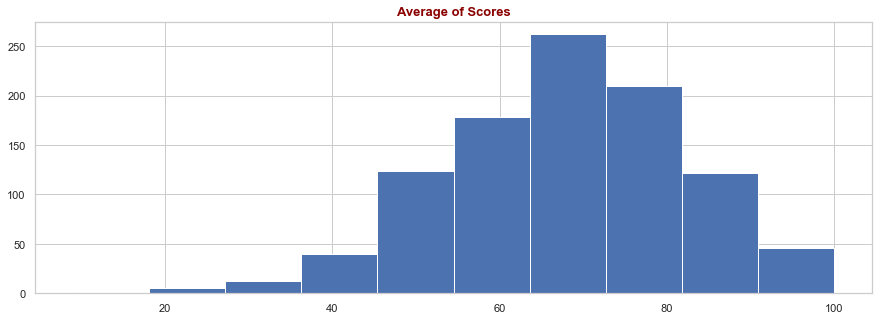

In [42]:
plt.figure(figsize = (15,5))

plt.hist(students['target_variable'])
plt.title("Average of Scores", fontdict=title_font)

plt.show()

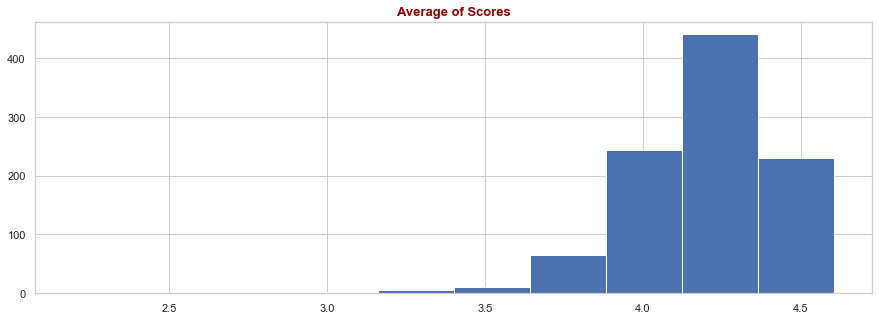

In [43]:
plt.figure(figsize = (15,5))

plt.hist(np.log(students['target_variable']))
plt.title("Average of Scores", fontdict=title_font)

plt.show()

In [44]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

dagilim_testleri = pd.DataFrame(columns=['jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

jb_stats = jarque_bera(np.log(students['target_variable']))
norm_stats = normaltest(np.log(students['target_variable']))
dagilim_testleri = dagilim_testleri.append({
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,2167.03935,0.00000,361.83694,0.00000


## Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [45]:
students_corr=students.corr()
display(students_corr)

,math score,reading score,writing score,sum_score,target_variable
math score,1.00000,0.81758,0.80264,0.91875,0.91875
reading score,0.81758,1.00000,0.95460,0.97033,0.97033
writing score,0.80264,0.95460,1.00000,0.96567,0.96567
sum_score,0.91875,0.97033,0.96567,1.00000,1.00000
target_variable,0.91875,0.97033,0.96567,1.00000,1.00000


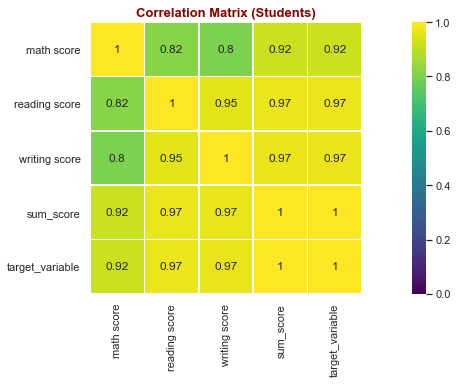

In [47]:
plt.figure(figsize=(18,5))

sns.heatmap(students_corr,square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title('Correlation Matrix (Students)',fontdict=title_font)

plt.show()